<a href="https://colab.research.google.com/github/joydata2023/github_colab_project/blob/main/Project4_Machine_learning_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction Problem¶
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
bonus: 1. check missiong value--use knn imputation
       2. EDA: stripplot/heatmap
       3. drop addtional column
       4. try more models: decision tree, random foreast
       5. parameter tunning > 81
       6. feature importance
       

# Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
%matplotlib inline

# Data loading

In [ ]:
# Loading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')



In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#Let's Make copy of the original datasets so we do not hamper the original datasets.

In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


# Exploratory Data Analysis¶

In [ ]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

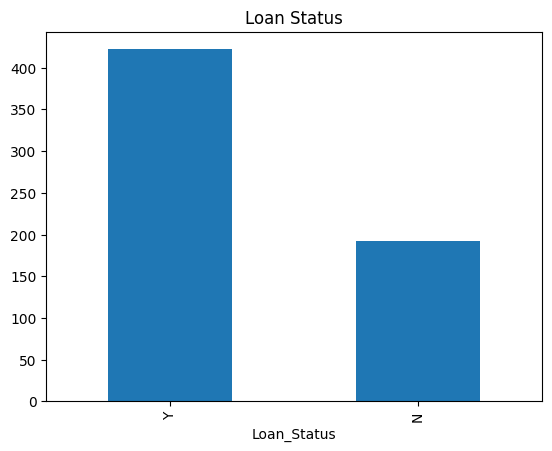

In [ ]:
train['Loan_Status'].value_counts().plot.bar(title='Loan Status')

# The loan of 422(around 69%) people out of 614 was approved.

Text(0.5, 0, '')

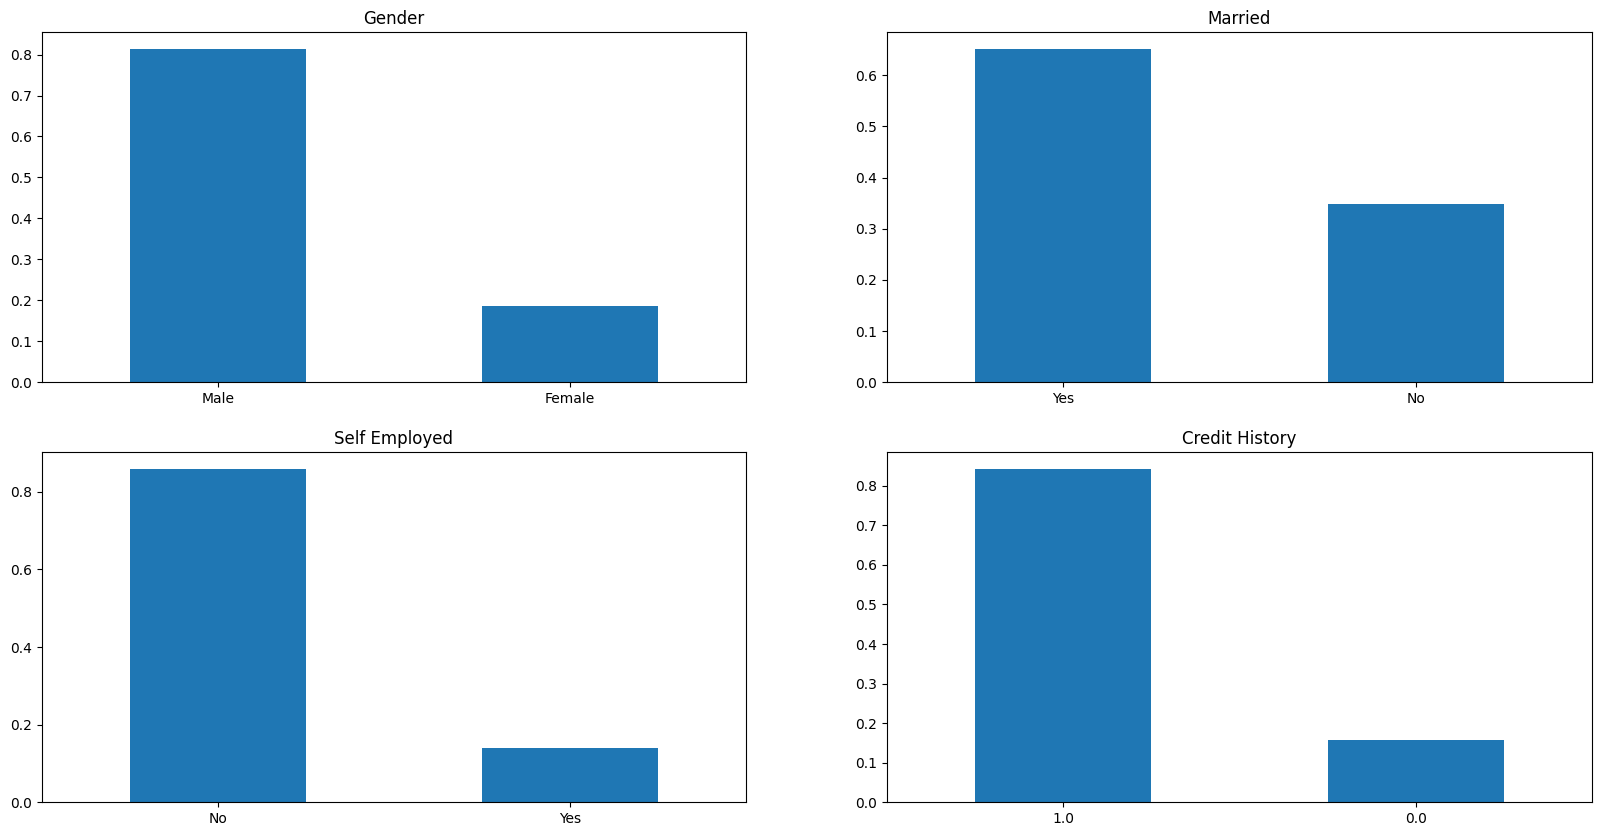

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',rot=0)
plt.xlabel('')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married',rot=0)
plt.xlabel('')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed',rot=0)
plt.xlabel('')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History',rot=0)
plt.xlabel('')



- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.


<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

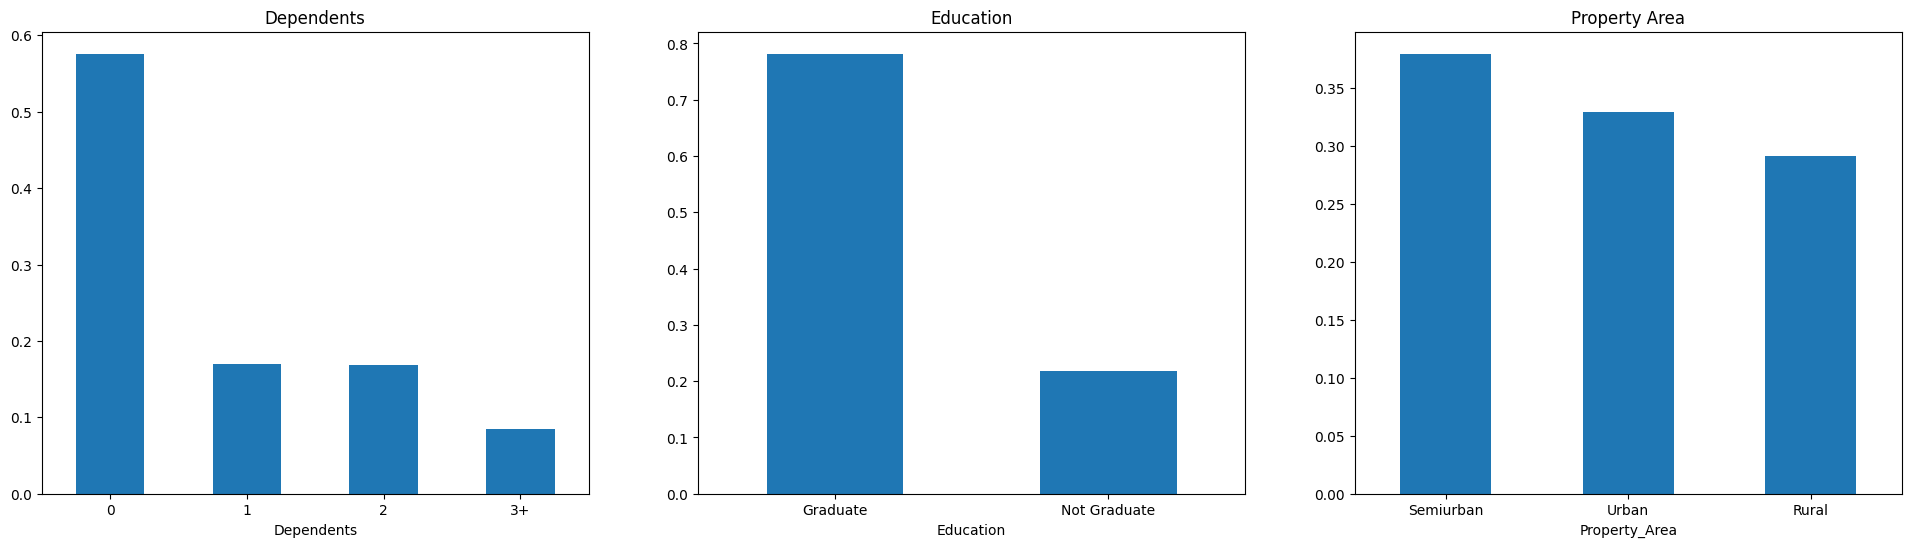

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents',rot=0)
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education',rot=0)
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area',rot=0)

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

<ipython-input-14-611b1d533703>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: ylabel='Frequency'>

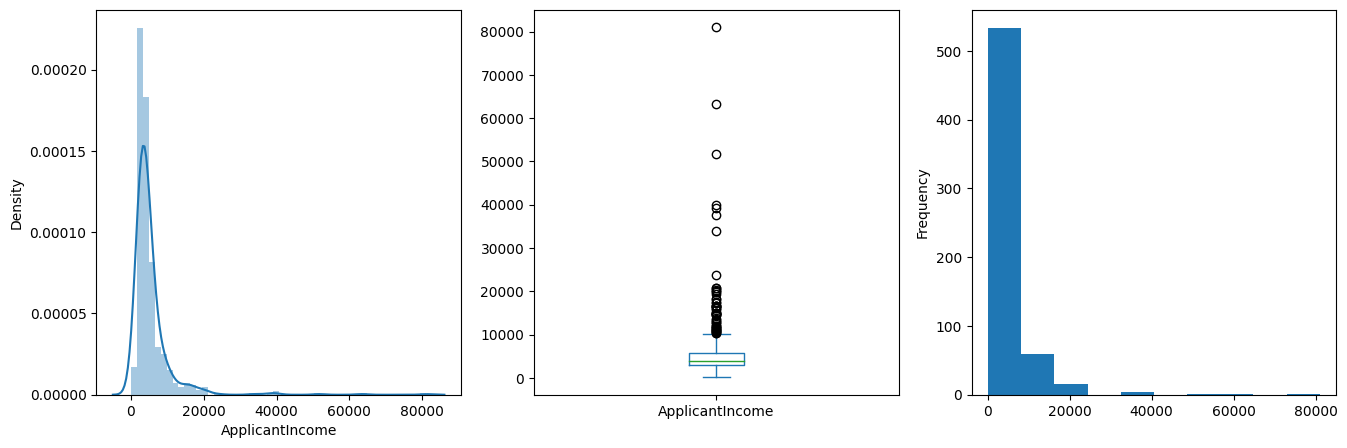

In [ ]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'])
plt.subplot(132)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(133)
train['ApplicantIncome'].plot.hist()

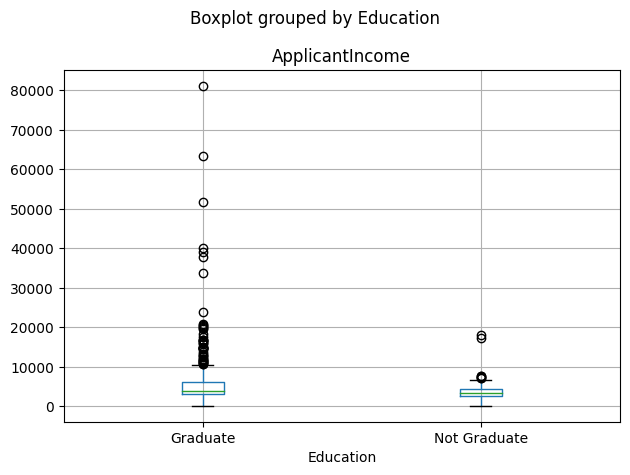

In [ ]:

train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()


<Axes: xlabel='Education', ylabel='ApplicantIncome'>

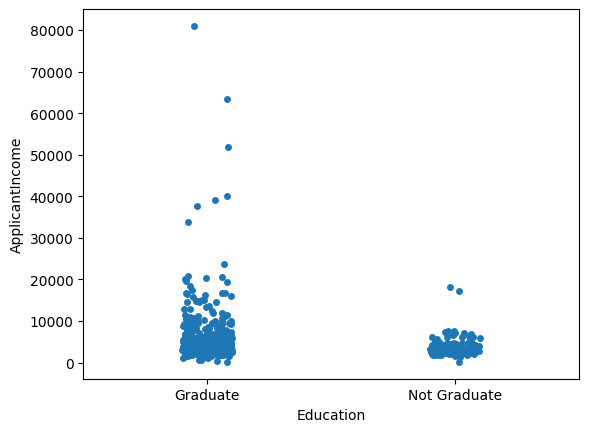

In [ ]:
sns.stripplot(x='Education', y='ApplicantIncome',data=train)

### There are higher number of graduates with very high incomes which are appearing to be outliers.

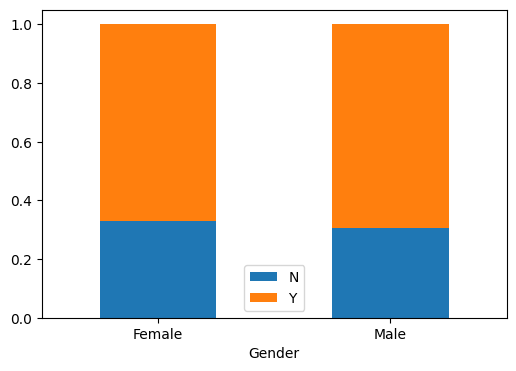

In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4),rot=0)
plt.legend(loc='best')

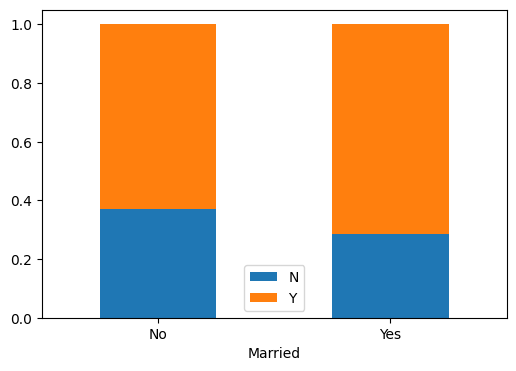

In [ ]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4),rot=0)
plt.legend(loc = 'best')


<Axes: xlabel='Loan_Status', ylabel='count'>

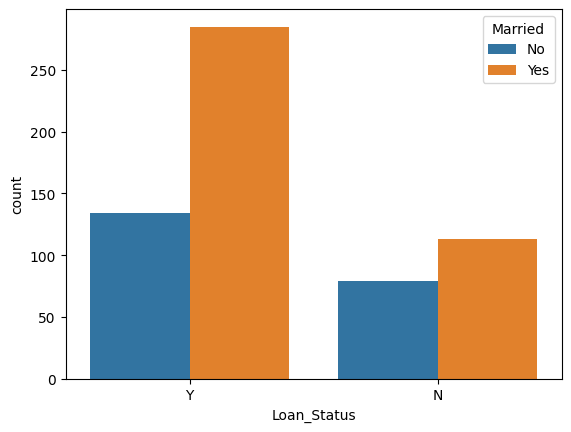

In [ ]:
sns.countplot(x='Loan_Status',hue='Married',data=train)

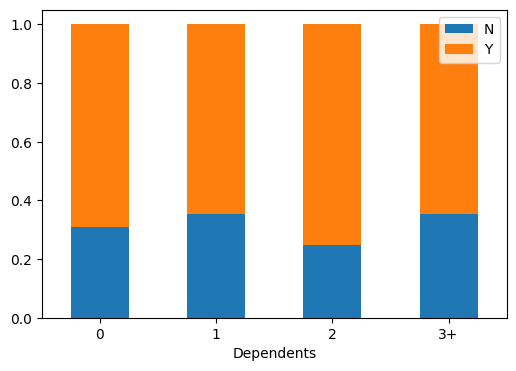

In [ ]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4),rot=0)
plt.legend(loc='best')

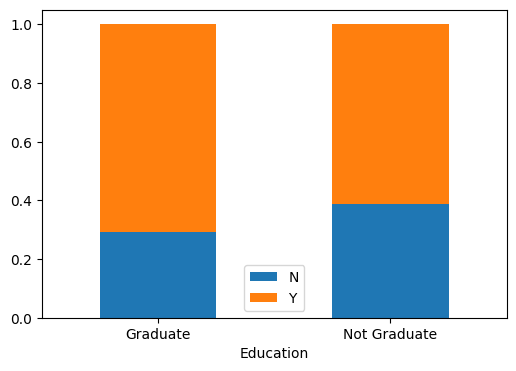

In [ ]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4),rot=0)
plt.legend(loc='best')

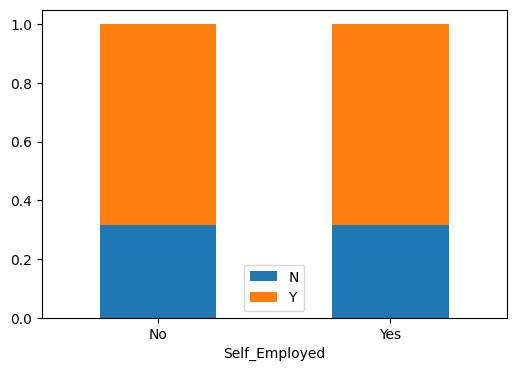

In [ ]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4),rot=0)
plt.legend(loc='best')

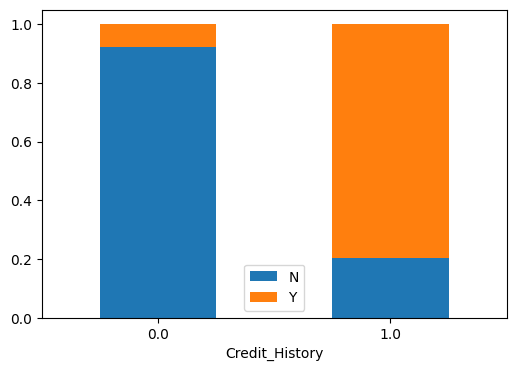

In [ ]:
Credit_Histroy = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_Histroy.div(Credit_Histroy.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4),rot=0)
plt.legend(loc='best')

<Axes: xlabel='Credit_History', ylabel='count'>

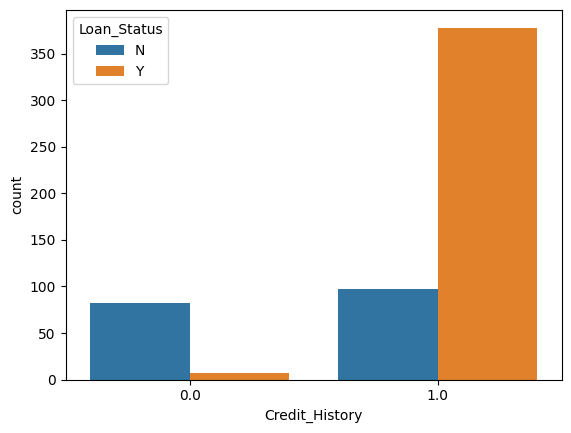

In [ ]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train)

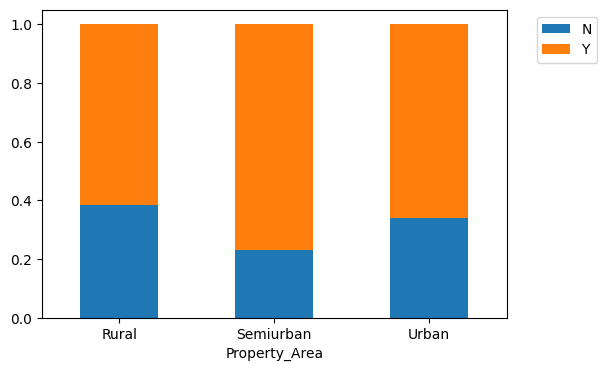

In [ ]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4),rot=0)
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of male applicants is higher for the approved loans.
- Proportion of married applicants is higher for the approved loans.
- Proportion of applicants having 2 dependents is higher for the approved loans.
- Proportion of graduated applicants is higher for the approved loans.
- The status of self-employed seems no effect on the loan approval.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

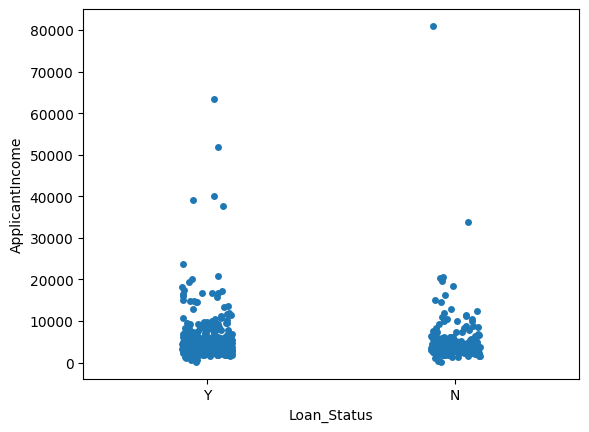

In [ ]:
sns.stripplot(x='Loan_Status', y='ApplicantIncome',data=train)

- Applicants who do not receive loans tend to have lower incomes

In [ ]:
# create new column 'Total_Income', and group by different income levels
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,8000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
train
# bucketization

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,NaN
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


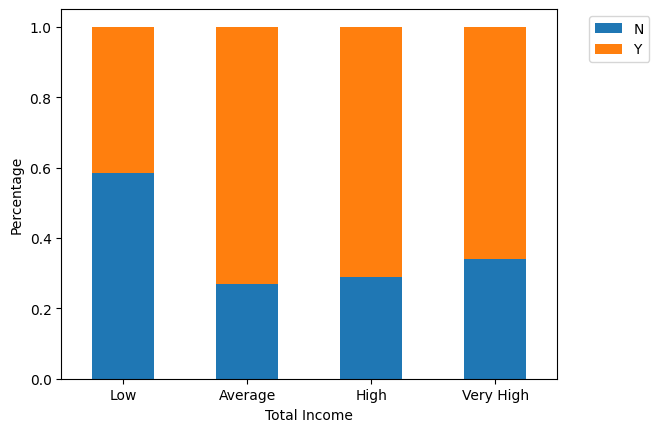

In [ ]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

<Axes: xlabel='Total_Income_bin', ylabel='count'>

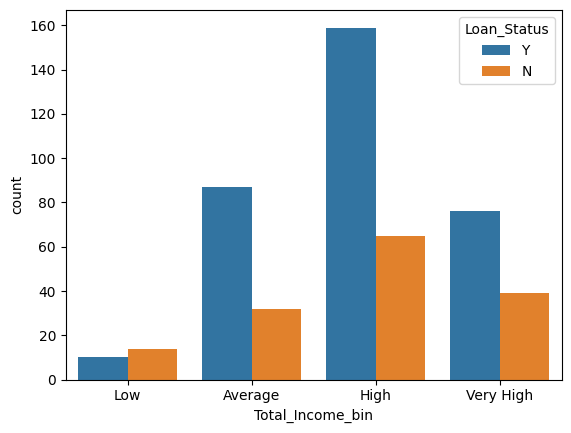

In [ ]:
sns.countplot(x='Total_Income_bin', hue='Loan_Status',data=train)

### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [ ]:
train = train.drop(['Total_Income', 'Total_Income_bin','Loan_ID'], axis=1)

In [ ]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)



<Axes: >

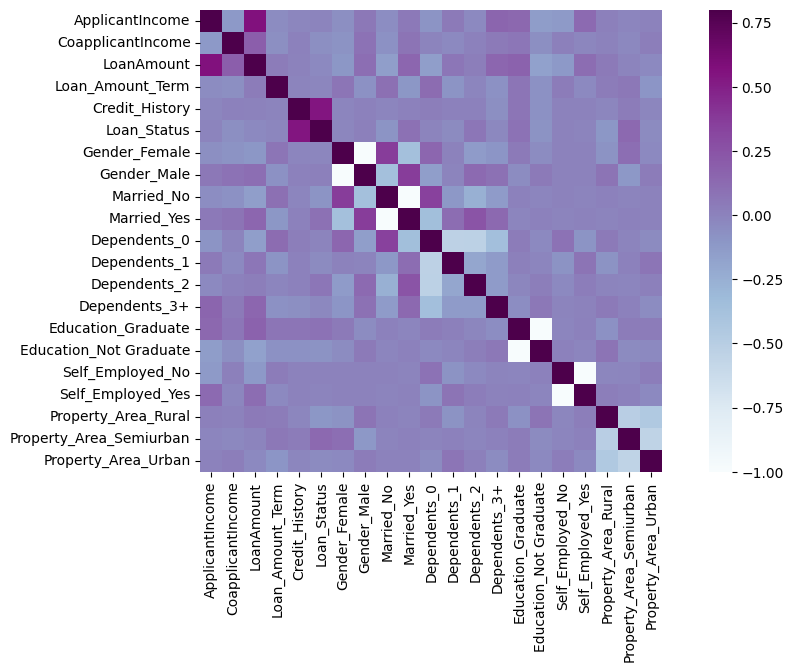

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmax=0.8, square=True, cmap='BuPu')

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# Data Cleaning

In [ ]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# 1. We impute missing values with mean, mode, median.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
#2. replace missing values with KNN imputation
cat_variables = train[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

train = train.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'],axis=1)
train = pd.concat([train,cat_dummies],axis=1)
train.head()

imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

train.isnull().sum()

In [ ]:
train.isnull().sum()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
#1. replace missing values with KNN imputation
cat_variables = test[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

test = test.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],axis=1)
test = pd.concat([test,cat_dummies],axis=1)
test.head()

imputer = KNNImputer(n_neighbors=5)
test = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

test.isnull().sum()

In [ ]:
# 2.impute missing values with mean, mode, median.
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

# Model Building

In [ ]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# one hot encoding

In [ ]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lsmodel = LogisticRegression()
lsmodel.fit(X_train, y_train)
lspredictions = lsmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,lspredictions))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51        52
           1       0.80      0.89      0.84       133

    accuracy                           0.76       185
   macro avg       0.70      0.66      0.68       185
weighted avg       0.75      0.76      0.75       185



In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
knnpredictions = knn.predict(X_test)
print(classification_report(y_test,knnpredictions))

              precision    recall  f1-score   support

           0       0.31      0.23      0.26        52
           1       0.73      0.80      0.76       133

    accuracy                           0.64       185
   macro avg       0.52      0.51      0.51       185
weighted avg       0.61      0.64      0.62       185



In [ ]:
# XGboost Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51        52
           1       0.80      0.86      0.83       133

    accuracy                           0.75       185
   macro avg       0.69      0.66      0.67       185
weighted avg       0.74      0.75      0.74       185



In [ ]:
# Neural Network, NN Model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
NN_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,NN_pred))

Epoch 1/100
43/43 [==============================] - 1s 3ms/step - loss: 0.7023 - accuracy: 0.5082
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6620
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.6993
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7576
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7832
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7832
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7902
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8042
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8112
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.8182
Epoch 11/

In [ ]:
# GBM: Gradient Boosting Machine, GBM Model
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])


gbm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
gbm_pred = (gbm_pred > 0.5).astype(int)
print(classification_report(y_test,gbm_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 300, number of negative: 129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.699301 -> initscore=0.843970
[LightGBM] [Info] Start training from score 0.843970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# SVM :Support Vector Machine Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.43      0.56        63
           1       0.76      0.95      0.85       122

    accuracy                           0.77       185
   macro avg       0.79      0.69      0.70       185
weighted avg       0.78      0.77      0.75       185



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        63
           1       0.79      0.78      0.78       122

    accuracy                           0.71       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.71      0.71      0.71       185



In [ ]:
print(accuracy_score(y_test, predictions))

0.7135135135135136


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100,oob_score=True)

In [ ]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
rfpredictions= rfmodel.predict(X_test)

In [ ]:
print(accuracy_score(y_test,rfpredictions))

0.8108108108108109


In [ ]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.91      0.49      0.64        63
           1       0.79      0.98      0.87       122

    accuracy                           0.81       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.83      0.81      0.79       185



In [ ]:
rfmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth':[2,3,5,10,15,20,50,100],
          'min_samples_leaf':[5,10,15,20,30,50,55,65],
          'n_estimators':[100,200,300,400,500,600,800]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfmodel, param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 15, 20, 30, 50, 55, 65],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 800]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8089087919695396

In [ ]:
rf_best =  grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
rf_best.feature_importances_

array([0.13768499, 0.07739257, 0.10468168, 0.00449925, 0.43966137,
       0.00674191, 0.00485102, 0.01358334, 0.02773574, 0.00858905,
       0.00716006, 0.00955464, 0.00947632, 0.02865826, 0.02342608,
       0.00491608, 0.00330073, 0.03580574, 0.03752766, 0.01475351])

In [ ]:
imp_train = pd.DataFrame({"Variables": X_train.columns,
                          "Imp": rf_best.feature_importances_})
imp_train.sort_values(by="Imp",ascending=False)

,Variables,Imp
4,Credit_History,0.470480
0,ApplicantIncome,0.117566
2,LoanAmount,0.104961
1,CoapplicantIncome,0.081219
3,Loan_Amount_Term,0.025678
18,Property_Area_Semiurban,0.023903
17,Property_Area_Rural,0.023859
13,Education_Graduate,0.022571
14,Education_Not Graduate,0.016781
9,Dependents_0,0.016650
